In [153]:
import matplotlib.pyplot as plt, mpld3
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib widget
plt.style.use('seaborn-paper')
import scipy.interpolate as ip
from mpld3 import plugins
import seaborn as sns
sns.set(style='ticks', palette='Set2')

Text(0.5, 1.0, 'Converged Optimal Energy Range for B07c 30% Tolerance (50000 Rays)')

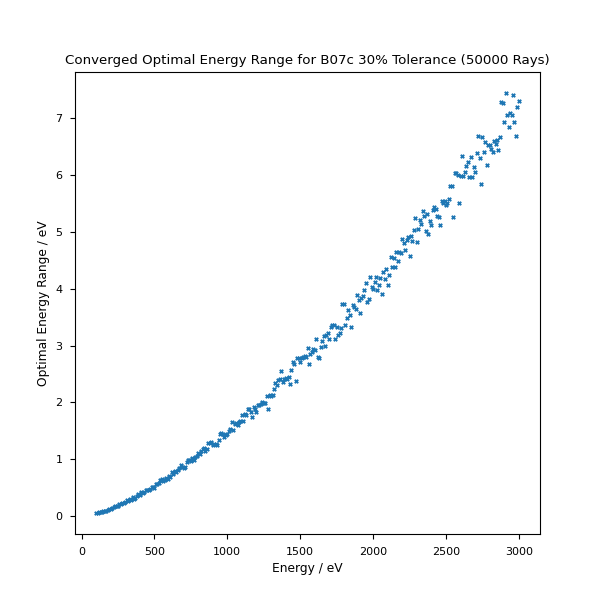

In [2]:
fig, ax = plt.subplots(figsize=(6,6))
x, y = np.loadtxt('fwhm2_50bins_10eVstepSize.csv', delimiter=',', unpack=True)
ax.scatter(x,y, s= 6, marker='x')
ax.set_xlabel('Energy / eV')
ax.set_ylabel('Optimal Energy Range / eV')
ax.set_title('Converged Optimal Energy Range for B07c 30% Tolerance (50000 Rays)')
#axins = zoomed_inset_axes(ax, 4, loc=1)
#axins.scatter(x,y, s=6, marker='x')
#axins.set_xlim(0,400)
#axins.set_ylim(0, 0.3)
#axins.set_yticks(np.arange(0,0.31,0.01),minor=True)
#mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
#fig.savefig("convergeslit.png", dpi = 300)

array(0.13921001)

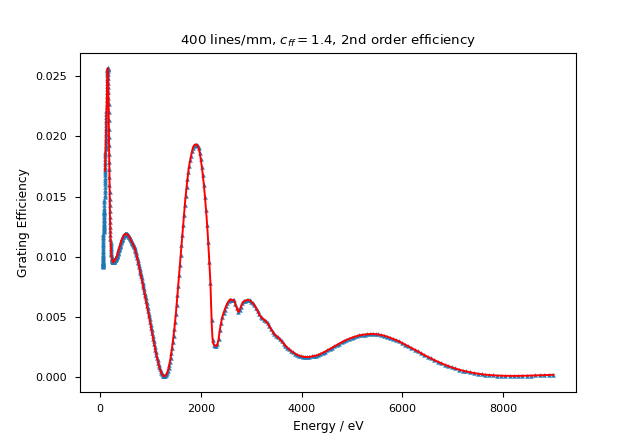

In [138]:
E, effc  = np.loadtxt('../B07_N400C1p4O2.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
plt.clf()
x = np.linspace(100,9000,10000)
plt.plot(x, inted(x), c= 'r')
plt.scatter(E,effc, s = 8, marker='^')
plt.title("400 lines/mm, $c_{ff} = 1.4$, 2nd order efficiency")
plt.xlabel("Energy / eV")
plt.ylabel("Grating Efficiency")
#plt.xlim(500,3000)
plt.show()

In [7]:
E, flux = np.loadtxt('B07flux.dat',skiprows=1, unpack=True)

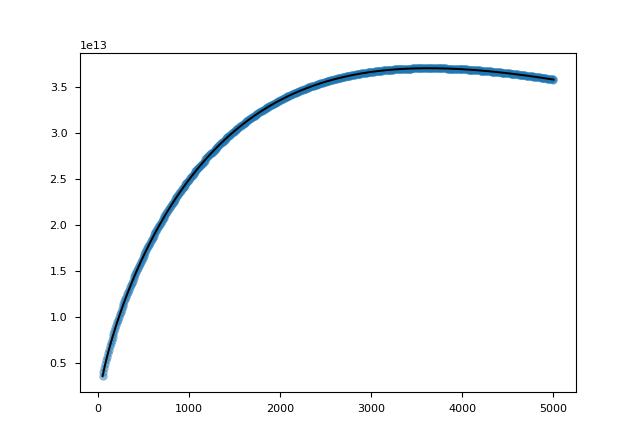

In [24]:
plt.clf()
plt.scatter(E, flux, alpha=0.5)
flux_int = ip.CubicSpline(E, flux)
plt.plot(E, flux_int(E), c= 'black')
#plt.semilogy()
#plt.semilogx()
plt.show()

In [9]:
2.53/1368

0.0018494152046783625

In [40]:
spectra = np.loadtxt('resultscff14o1upto3000.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))

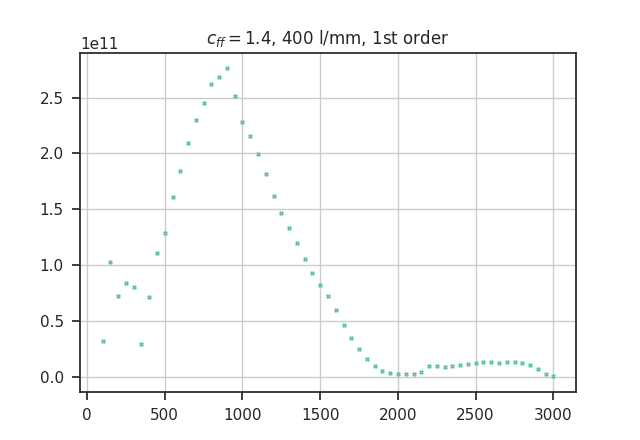

In [184]:
spectra1 = np.loadtxt('resultscff14o1upto3000.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra1[:,0], spectra1[:,3], s=6, marker='x')
ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm, 1st order")
ax.grid(which='both')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')
#ax.semilogy()

In [58]:
import csv
import json

In [123]:
with open("resultscff14o1upto3000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [125]:
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]


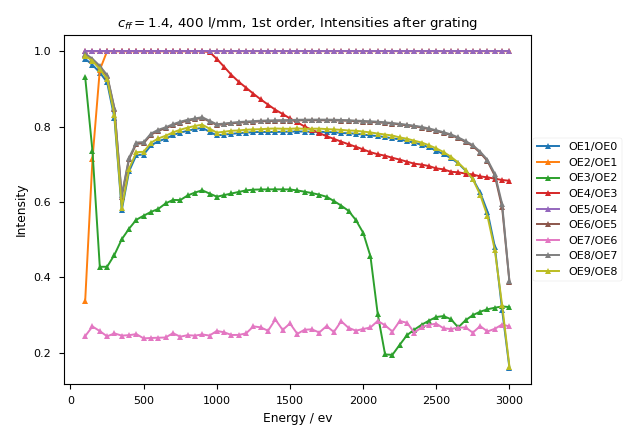

In [128]:
fig, ax = plt.subplots()
ax.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax.set_ylabel('Intensity')
ax.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()


In [126]:
E = [row[0] for row in intensities]
oe1_int = [row[1]['OE1']/50000 for row in intensities]
oe2_int = [row[1]['OE2']/row[1]['OE1'] for row in intensities]
oe3_int = [row[1]['OE3']/row[1]['OE2'] for row in intensities]
oe4_int = [row[1]['OE4']/row[1]['OE3'] for row in intensities]
oe5_int = [row[1]['OE5']/row[1]['OE4'] for row in intensities]
oe6_int = [row[1]['OE6']/row[1]['OE5'] for row in intensities]
oe7_int = [row[1]['OE7']/row[1]['OE6'] for row in intensities]
oe8_int = [row[1]['OE8']/row[1]['OE7'] for row in intensities]
oe9_int = [row[1]['OE9']/row[1]['OE8'] for row in intensities]

In [127]:
intensities

[[101.0,
  {'OE1': 48986.86065343197,
   'OE2': 16471.200762397126,
   'OE3': 15345.52741161628,
   'OE4': 15345.527411616282,
   'OE5': 15345.527411616282,
   'OE6': 15200.423114225443,
   'OE7': 3707.0551091002144,
   'OE8': 3684.120882689337,
   'OE9': 3639.4600085126112}],
 [151.0,
  {'OE1': 48181.80892101603,
   'OE2': 34370.299881450745,
   'OE3': 25259.533028354024,
   'OE4': 25259.533028354024,
   'OE5': 25259.533028354024,
   'OE6': 24682.52585738861,
   'OE7': 6655.106633415555,
   'OE8': 6520.375690551429,
   'OE9': 6352.12111113116}],
 [201.0,
  {'OE1': 47170.03574109177,
   'OE2': 44816.53195407169,
   'OE3': 19176.926651722806,
   'OE4': 19176.926651722806,
   'OE5': 19176.926651722806,
   'OE6': 18375.31339027886,
   'OE7': 4728.301340190019,
   'OE8': 4542.968153158912,
   'OE9': 4327.088356517128}],
 [251.0,
  {'OE1': 45861.41319220477,
   'OE2': 45861.41319220477,
   'OE3': 19630.1787263512,
   'OE4': 19630.1787263512,
   'OE5': 19630.1787263512,
   'OE6': 18336.57067

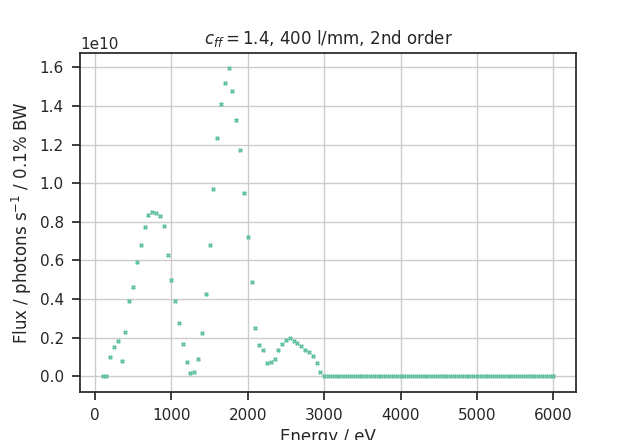

In [185]:
spectra2 = np.loadtxt('resultscff14o2upto6000.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra2[:,0], spectra2[:,3], s=6, marker='x')
ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm, 2nd order")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$ / 0.1% BW")
ax.grid(which='both')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

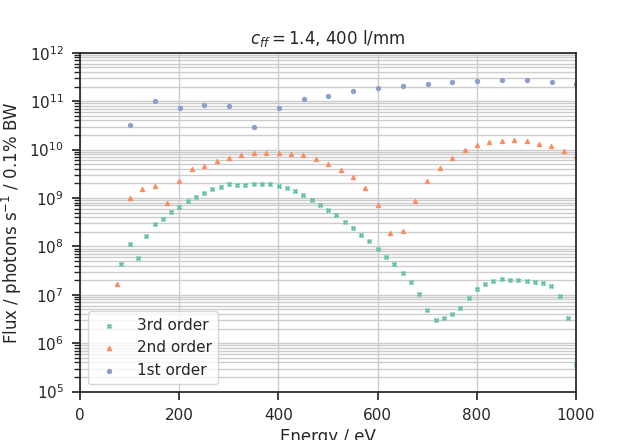

In [192]:
spectra3 = np.loadtxt('resultscff14o3upto9000.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra3[:,0]/3, spectra3[:,3], s=8, marker='x', label="3rd order")
ax.scatter(spectra2[:,0]/2, spectra2[:,3], s=8, marker='^', label="2nd order")
ax.scatter(spectra1[:,0], spectra1[:,3], s=8, marker='o', label="1st order")

ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$ / 0.1% BW")
ax.grid(which='both')
ax.semilogy()
ax.set_xlim(0, 1000)
ax.set_ylim(1E5, 1E12)
ax.legend()
plugins.connect(fig, plugins.MousePosition(fontsize=14))
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

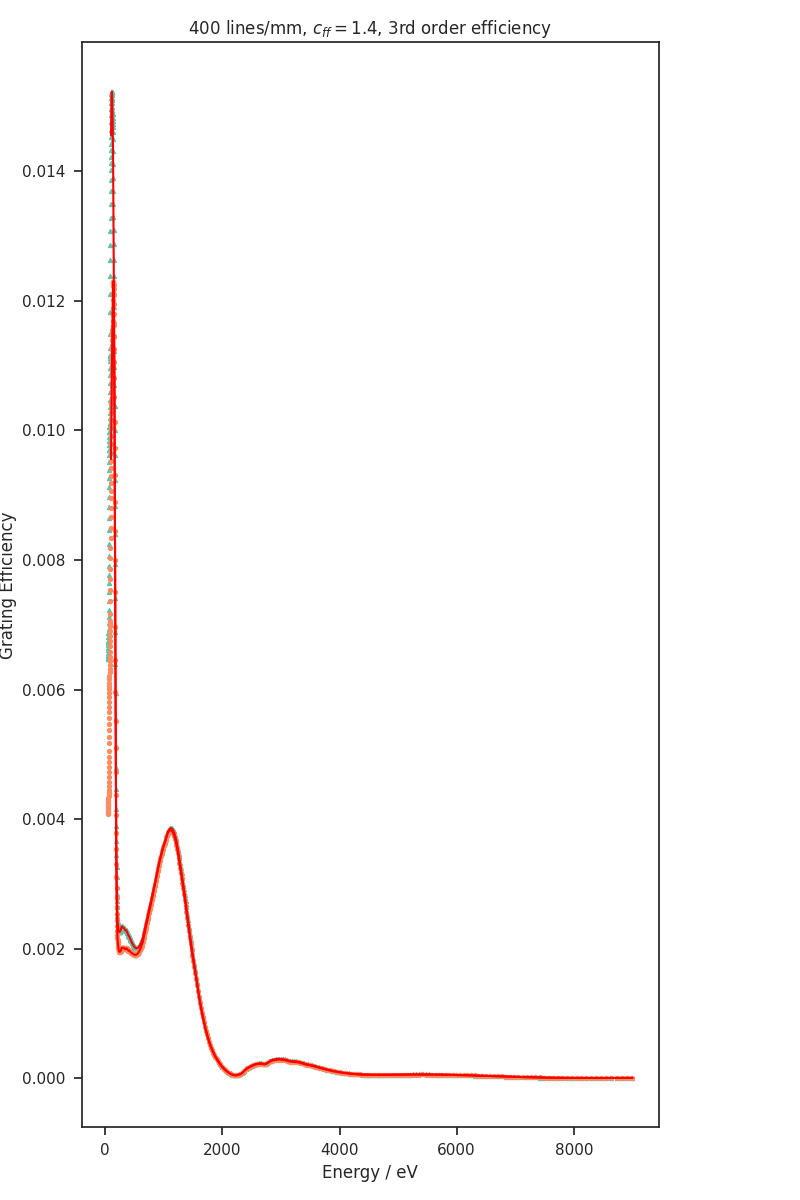

In [194]:
E, effc  = np.loadtxt('../B07_N400C1p4O3.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
plt.clf()
x = np.linspace(100,9000,10000)
plt.plot(x, inted(x), c= 'r')
plt.scatter(E,effc, s = 8, marker='^')
plt.title("400 lines/mm, $c_{ff} = 1.4$, 3rd order efficiency")
plt.xlabel("Energy / eV")
plt.ylabel("Grating Efficiency")
E, effc  = np.loadtxt('./B07cN4C1p4O3F35.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
plt.plot(x, inted(x), c= 'r')
plt.scatter(E,effc, s = 8, marker='o')
#plt.xlim(500,3000)
plt.show()

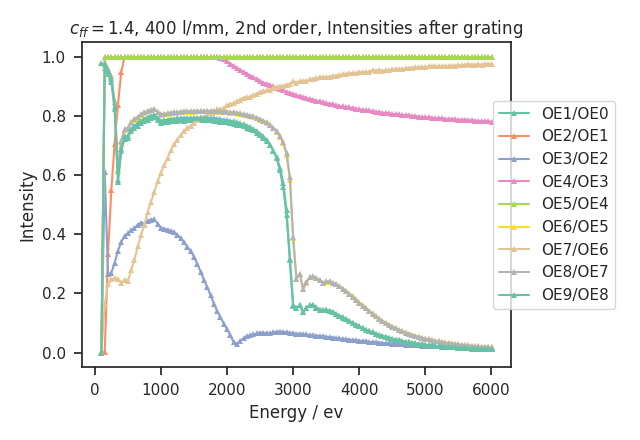

In [159]:
with open("resultscff14o2upto6000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]

except ZeroDivisionError:
    pass
fig, ax = plt.subplots()
ax.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2nd order, Intensities after grating')
ax.set_ylabel('Intensity')
ax.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()


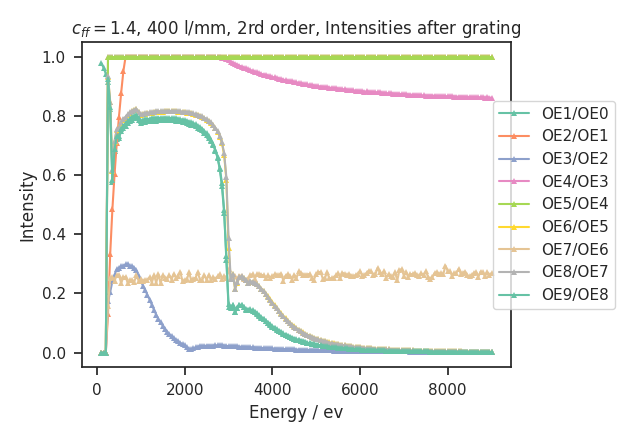

In [182]:
with open("resultscff14o3upto9000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]

except ZeroDivisionError:
    pass
fig, ax = plt.subplots()
ax.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2rd order, Intensities after grating')
ax.set_ylabel('Intensity')
ax.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()

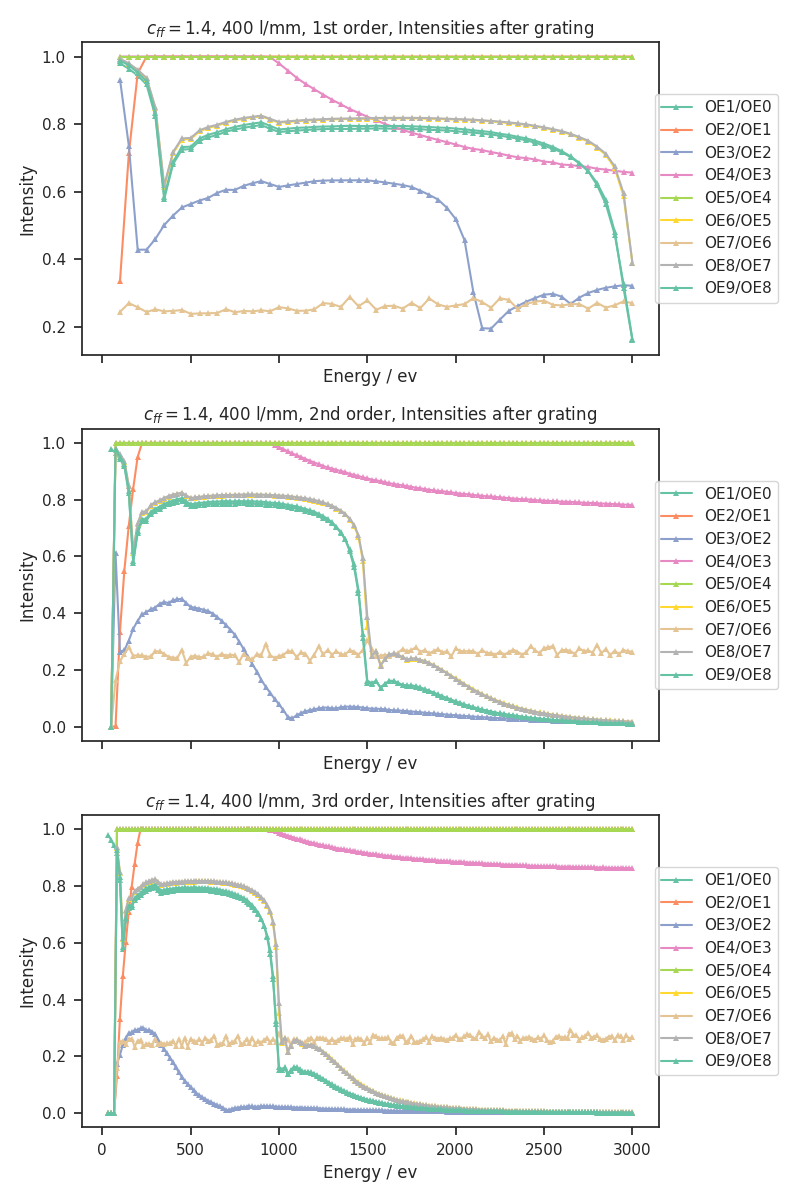

In [183]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True, figsize=(8,12))
with open("resultscff14o1upto3000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax1.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax1.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o2upto6000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax2.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2nd order, Intensities after grating')
ax2.set_ylabel('Intensity')
ax2.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax2.plot(E/2, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax2.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o3upto9000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E/3, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()
fig.savefig("cff1p4_ratio.png", dpi=300)


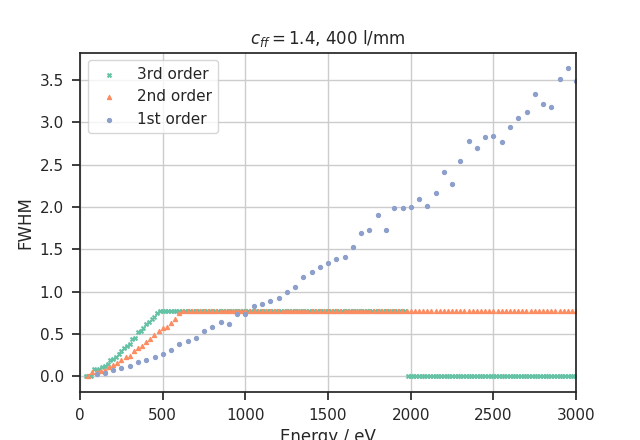

In [178]:
fig, ax = plt.subplots()
ax.scatter(spectra3[:,0]/3, spectra3[:,1], s=8, marker='x', label="3rd order")
ax.scatter(spectra2[:,0]/2, spectra2[:,1], s=8, marker='^', label="2nd order")
ax.scatter(spectra1[:,0], spectra1[:,1], s=8, marker='o', label="1st order")

ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("FWHM")
ax.grid(which='both')
ax.set_xlim(0, 3000)
#ax.semilogy()
ax.legend()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

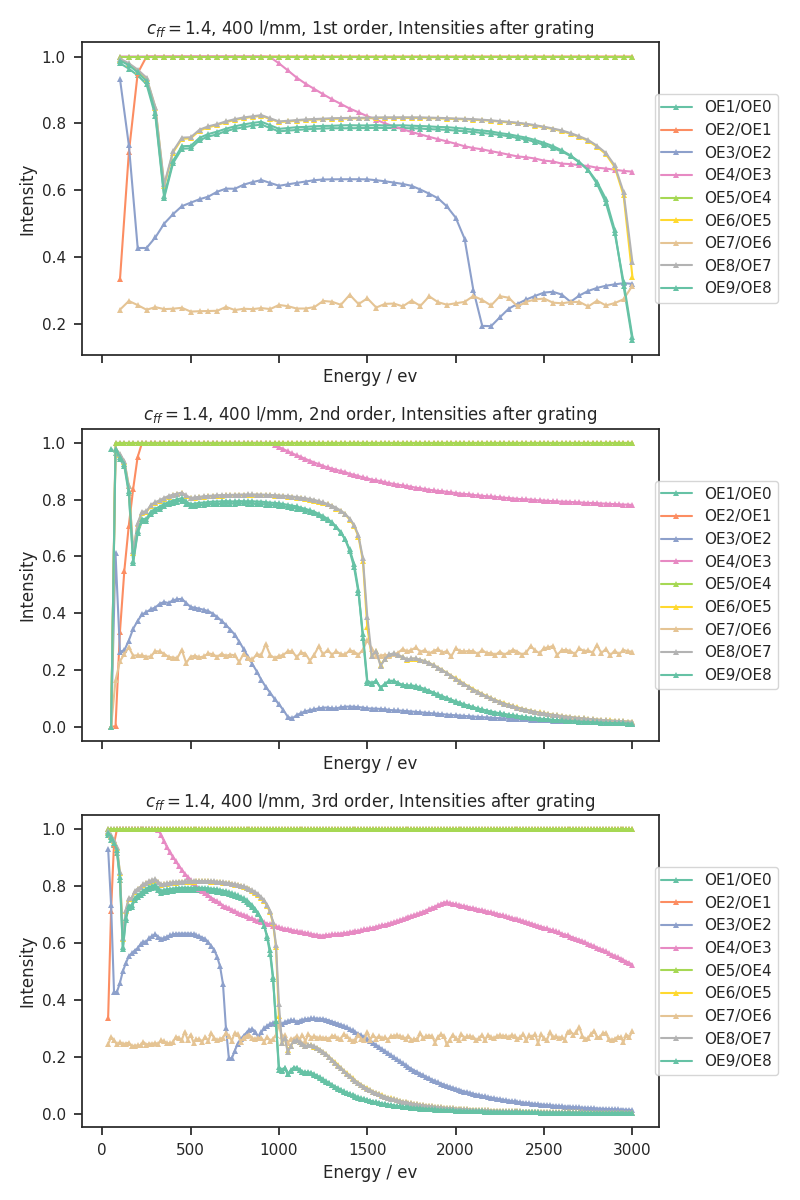

In [195]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True, figsize=(8,12))
with open("resultscff14o1upto3000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax1.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax1.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o2upto6000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax2.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2nd order, Intensities after grating')
ax2.set_ylabel('Intensity')
ax2.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax2.plot(E/2, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax2.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o3upto9000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E/3, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()
fig.savefig("cff1p4_ratio.png", dpi=300)
